In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis (EDA)

In [3]:
#The goal here is to find out more about the data and 
#become a subject matter export on the dataset you're working with.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

In [6]:

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [23]:
# Out of 1025 records, 526 records are positive(having disease) 
# and 499 records are negative(doesn't have disease)
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

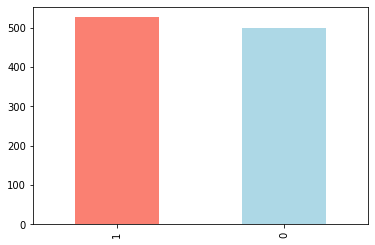

In [21]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [8]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [12]:
# Out of 1025 records, 713 records are of males 
# and 312 records are of females
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:>

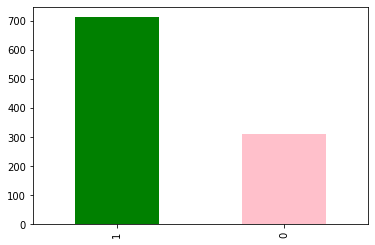

In [19]:
data['sex'].value_counts().plot(kind='bar', color=['green', 'pink'])


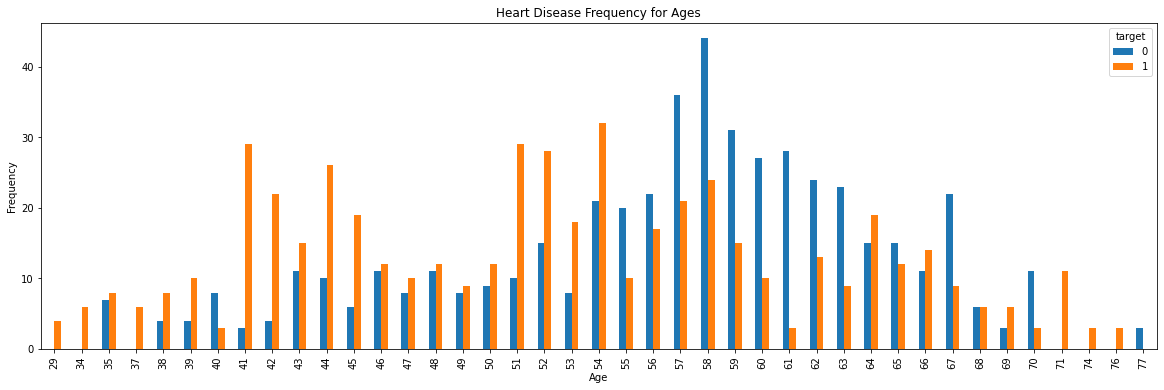

In [9]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Checking for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#Notes:
# 1)We have 165 person with heart disease and 138 person without 
# heart disease, so our problem is balanced.

# 2)Looks like the perfect dataset!!! No null values :-)

In [24]:
cat_values = []
conti_values = []

for col in data.columns:
    if len(data[col].unique()) >= 10:
        conti_values.append(col)
    else:
        cat_values.append(col)
        
print("catageroy values: ", cat_values)
print("continous values: ", conti_values)

catageroy values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


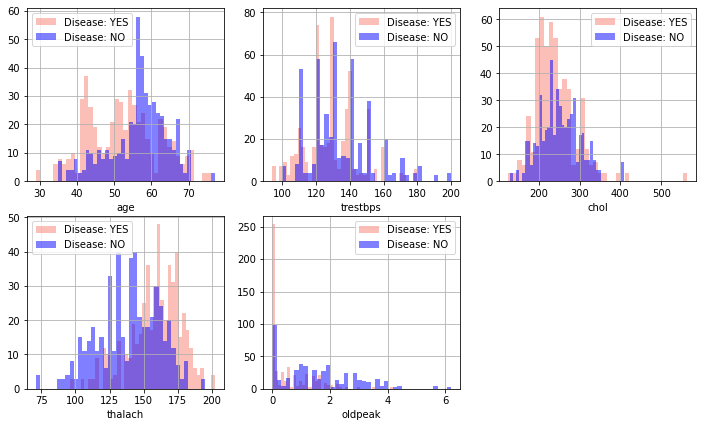

In [29]:
plt.figure(figsize=(12,7))

for i, col in enumerate(conti_values, 1):
    plt.subplot(2,3,i)
    data[data.target ==1][col].hist(bins=40, color='salmon', alpha=0.5,  label='Disease: YES')
    data[data.target ==0][col].hist(bins=40, color='blue', alpha=0.5,  label='Disease: NO')
    plt.xlabel(col)
    plt.legend()

In [30]:
#* trestbps[resting bp] anything above 130-140 is generally of concern
#* chol[cholesterol] greater than 200 is of concern
#* thalach People over 140 value are more likely to have heart disease
#* oldpeak with value 0 are more than likely to have 
#   heart disease than any other value

## Data preprocessing(Cleaning outliers)

<AxesSubplot:>

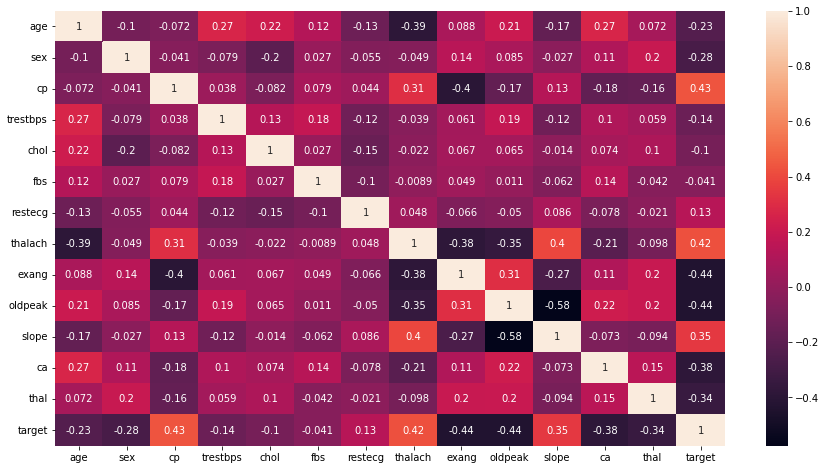

In [32]:
x = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

In [ ]:
# It is clearly visible that no column is a significant 
# contributor among all the features.

#So we are going to take all the features for the model evaluation.

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


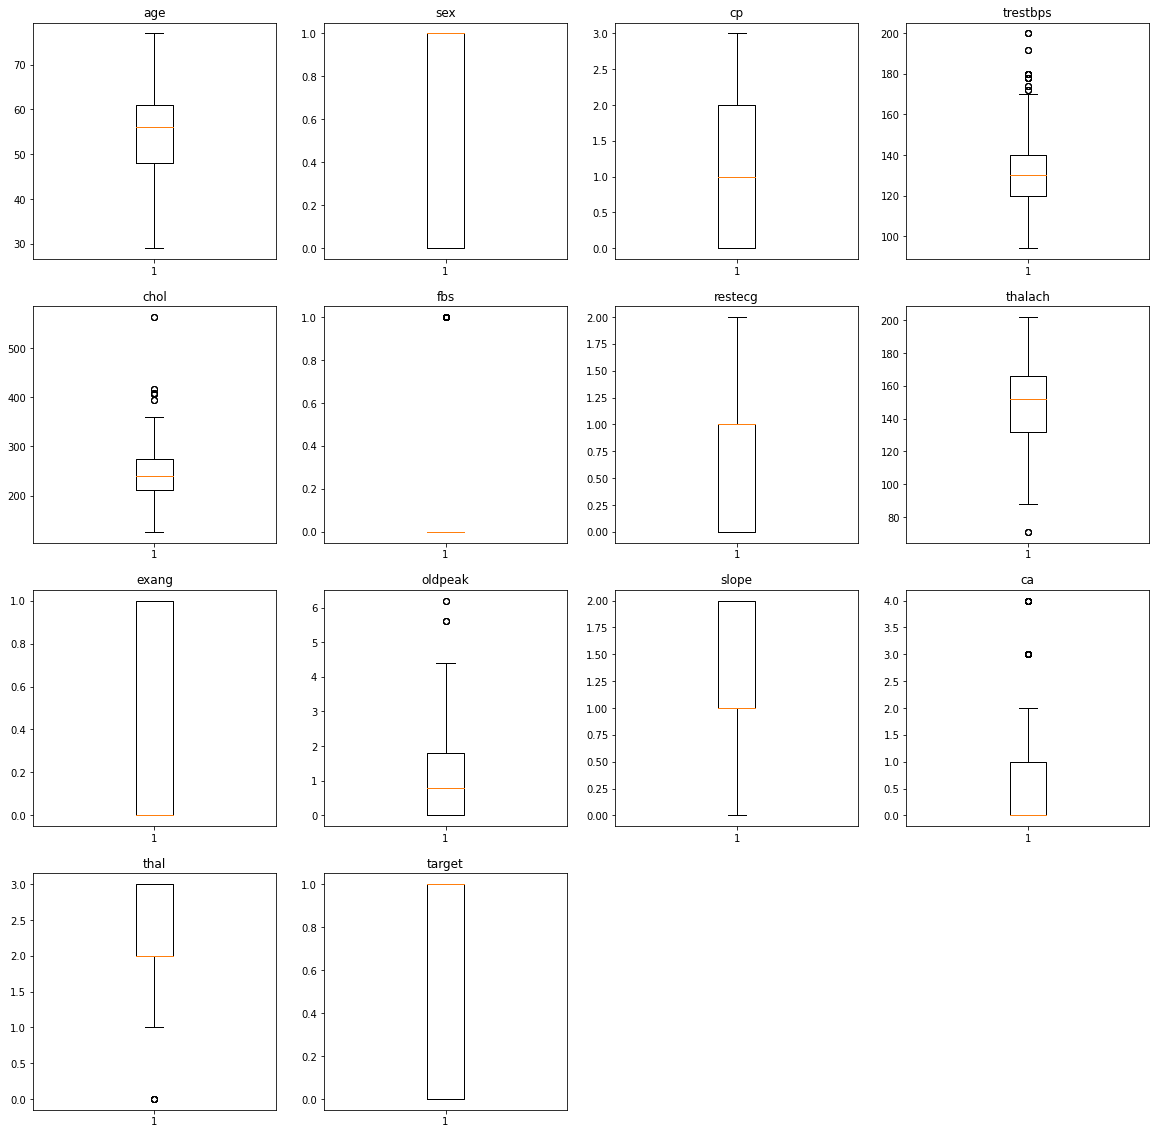

In [37]:
x = 1
plt.figure(figsize = (20,20))

for i in data.columns:
    plt.subplot(4,4,x)
    plt.boxplot(data[i])
    plt.title(i)
    x = x+1

In [38]:
#Maximum number of outliers can be seen in the column 'trestbps'.

In [39]:
#Removing outliers from 'trestbps' column.
q1 = data['trestbps'].quantile(q = 0.25)
q3 = data["trestbps"].quantile(q = 0.75)
IQR = q3 - q1

IQR_lower_limit = int(q1 - (1.5*IQR))
IQR_upper_limit = int(q3 + (1.5*IQR))

print("Upper limit of IQR:",IQR_upper_limit)
print("Lower limit of IQR:",IQR_lower_limit)

cleaned_data = data[data["trestbps"]<IQR_upper_limit]

Upper limit of IQR: 170
Lower limit of IQR: 90


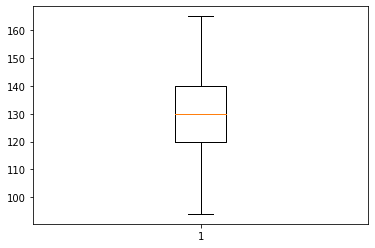

In [40]:
plt.boxplot(cleaned_data["trestbps"]);

In [41]:
cleaned_data.shape

(980, 14)

In [42]:
data.shape

(1025, 14)

In [43]:
# So now there are only 980 rows left in the dataset after 
# clearing the outliers and  the 14 columns as they were.

# Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
#One Hot Encoding
cat_values.remove('target')
cleaned_data = pd.get_dummies(cleaned_data, columns=cat_values)

In [47]:
#Train - Test Split
X = cleaned_data.drop(columns = 'target')
y = cleaned_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[conti_values] = sc.fit_transform(X_train[conti_values])
X_test[conti_values] = sc.transform(X_test[conti_values])

<ipython-input-51-c9ea7de078dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[conti_values] = sc.fit_transform(X_train[conti_values])
C:\Users\naush\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-51-c9ea7de078dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

### Logistic Reg 

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred_test = logreg.predict(X_test)


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
lr_acc_score=accuracy_score(y_test, y_pred_test)
lr_acc_score


0.8673469387755102

In [ ]:
# Our model is 86.73 % accurate by applying Logistic regeression

In [56]:
confusion_matrix(y_test, y_pred_test)

array([[82, 13],
       [13, 88]], dtype=int64)

### Model_prediction :
- Type_1 Error: 13 were diagnosed positive when they were not having the disease.
- Type_2 Error: 13 were diagnosed negative when they actually having the disease.

### Applying other Machine Learning Algorithms

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)
print(nb_acc_score)

0.8418367346938775


In [ ]:
#Our model is 84.18 % accurate by applying Naive Bayes.

In [58]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(rf_acc_score)

0.9285714285714286


In [59]:
#Our model is 92.86 % accurate by applying Random Forest Classfier.

In [80]:
m4= 'K-Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_acc_score)

0.8826530612244898


In [62]:
#Our model is 88.27 % accurate by applying K-Neighbors Classifier.

In [63]:
m5 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_acc_score)

0.9387755102040817


In [64]:
#Our model is 93.88 % accurate by applying Decision Tree Classifier.

In [67]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.734694
1,Naive Bayes,84.183673
2,Random Forest,92.857143
3,K-Nearest Neighbour,88.265306
4,Decision Tree,93.877551


## Conclusion
Over all the Machine Learning Algorithms, Decision Tree(93.88 %) and Random Forest(92.86 %) Algorithm gives us the best Accuracy.